<a href="https://colab.research.google.com/github/Yogeshjoshi142/2201031000142/blob/main/House_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.datasets import fetch_california_housing


load The california House Price  Dataset


In [10]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame


In [6]:
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [8]:
print(df.columns)


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


Features & Target split

In [9]:
X = df.drop("MedHouseVal", axis=1)   # Features
y = df["MedHouseVal"]                # Target

Train-Test Split


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

 Train XGBoost Regressor


In [12]:
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    objective='reg:squarederror'
)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

 Predictions

In [13]:
y_pred = model.predict(X_test)

Evaluation

In [14]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("\n📊 Model Evaluation Results")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)


📊 Model Evaluation Results
Mean Absolute Error (MAE): 0.31441762588520844
Mean Squared Error (MSE): 0.22597654747534304
Root Mean Squared Error (RMSE): 0.47536990594203904
R2 Score: 0.8275526562869744


 Visualization
 Actual vs Predicted

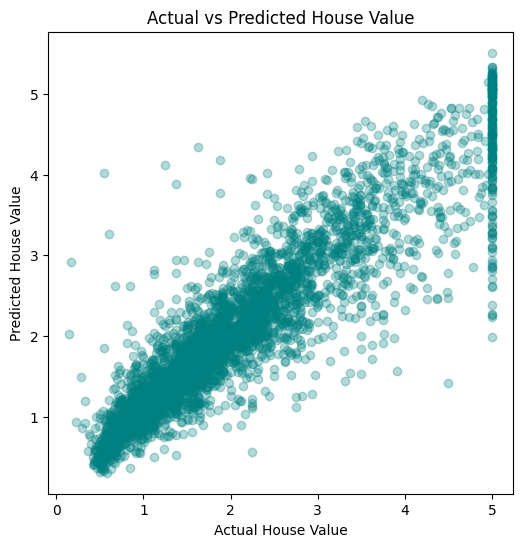

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3, color="teal")
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Value")
plt.show()

Feature Importance

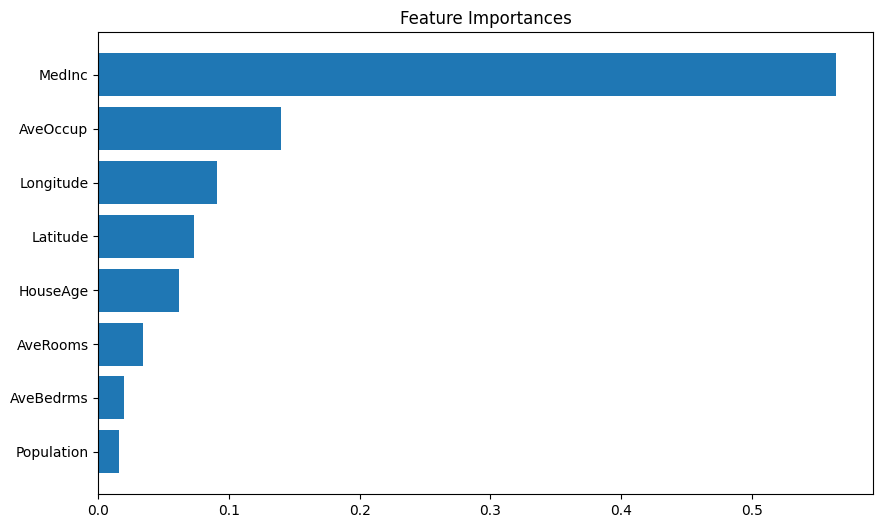

In [16]:

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title("Feature Importances")
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

Hyperparameter Tuning for(Better Accuracy)

In [18]:
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 4, 6],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.8, 1]
}

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="r2",
    cv=3,
    verbose=2,
    n_jobs=-1
)


grid_search.fit(X_train, y_train)

print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best R2 Score from CV:", grid_search.best_score_)




Fitting 3 folds for each of 108 candidates, totalling 324 fits
✅ Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500, 'subsample': 1}
✅ Best R2 Score from CV: 0.844104917567965



Train Model with Best Params

In [19]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

Evaluation

In [20]:
mae = metrics.mean_absolute_error(y_test, y_pred_best)
mse = metrics.mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred_best)

print("\n📊 Tuned Model Evaluation Results")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)


📊 Tuned Model Evaluation Results
Mean Absolute Error (MAE): 0.2852801291073662
Mean Squared Error (MSE): 0.19415416739738103
Root Mean Squared Error (RMSE): 0.4406292856783138
R2 Score: 0.8518369679838316


Comparison Table

In [21]:
results = pd.DataFrame({
    "Model": ["Base XGBoost", "Tuned XGBoost"],
    "MAE": [metrics.mean_absolute_error(y_test, y_pred), mae],
    "RMSE": [np.sqrt(metrics.mean_squared_error(y_test, y_pred)), rmse],
    "R2 Score": [metrics.r2_score(y_test, y_pred), r2]
})

print(results)

           Model       MAE      RMSE  R2 Score
0   Base XGBoost  0.314418  0.475370  0.827553
1  Tuned XGBoost  0.285280  0.440629  0.851837


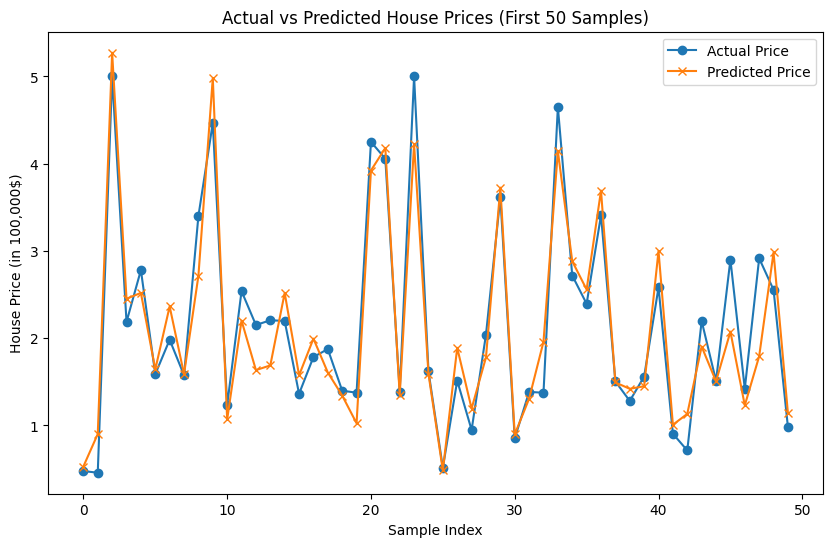

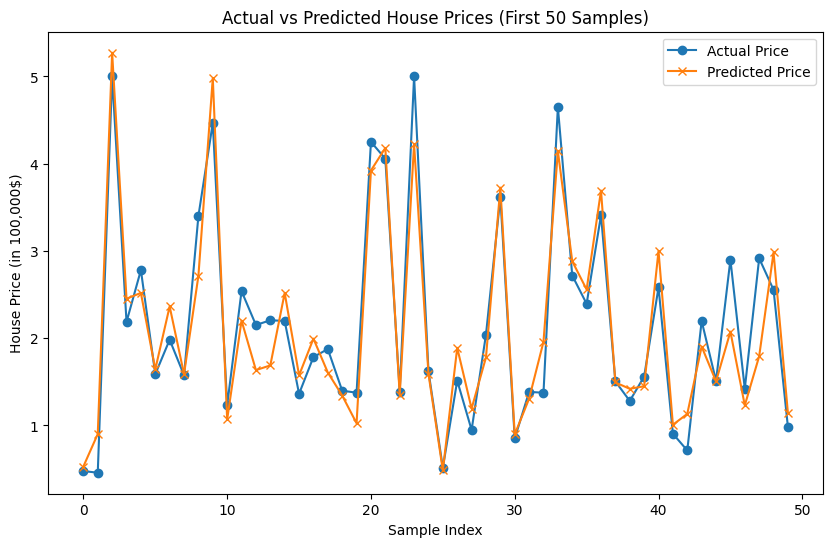

In [23]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values[:50], label="Actual Price", marker="o")
plt.plot(y_pred_best[:50], label="Predicted Price", marker="x")
plt.xlabel("Sample Index")
plt.ylabel("House Price (in 100,000$)")
plt.title("Actual vs Predicted House Prices (First 50 Samples)")
plt.legend()
plt.show()